# Homework 4 Part 2 - Solutions

In [1]:
# Import all necessary libraries and magics

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline
plt.style.use('bmh')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, rand_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding as LLE
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras

# Question 1 (11 points)

**In this problem, you will be working with a dataset of handwritten mathematical symbols (look for the ````data.npy```` in your repository).**

**This dataset contains 3871 grayscale $100 \times 100$ pixel images of handwritten math symbols. Each image is flattened to a 1-D vector of size 10,000.**

In [2]:
X = np.load('data.npy').T/255.

X.shape

(3871, 10000)

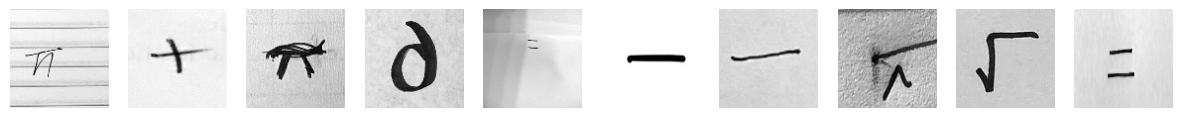

In [3]:
# Visualization example
idx = np.random.randint(0,X.shape[0], size=10)

plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[idx[i],:].reshape(100,100), cmap='gray')
    plt.axis('off');

**There is a total of 10 labels, as described in the cell below.**

In [4]:
# Labels Integer Encoding

labels_names = ['x', #label 0
                'square root', #label 1
                'plus sign', #label 2
                'negative sign', #label 3
                'equal', #label 4
                'percent', #label 5
                'partial', #label 6
                'product', #label 7
                'pi', #label 8
                'summation' #label 9
               ]

**Suppose that your goal is to train a classifier that is able to predict a handwritten math symbol. But the problem is that the data is not annotated, that is, we do not have labels. Answer the following questions:**

1. (6 points) **Utilize K-Means clustering (with $k=50$) for the purpose of label propagation, facilitating the task of labeling all images with only 50 examples.**

In [5]:
k = 50 

kmeans = KMeans(n_clusters=k, random_state=3) 

# distance of each sample to the cluster centroid
X_dist = kmeans.fit_transform(X) 

X_dist.shape

(3871, 50)

In [6]:
# find the representative sample
# the one with the closest distance to the cluster centroid

representative_symbol_idx = np.argmin(X_dist, axis=0)

representative_symbol_idx.shape

(50,)

In [7]:
X_representative_symbol = X[representative_symbol_idx]

X_representative_symbol.shape

(50, 10000)

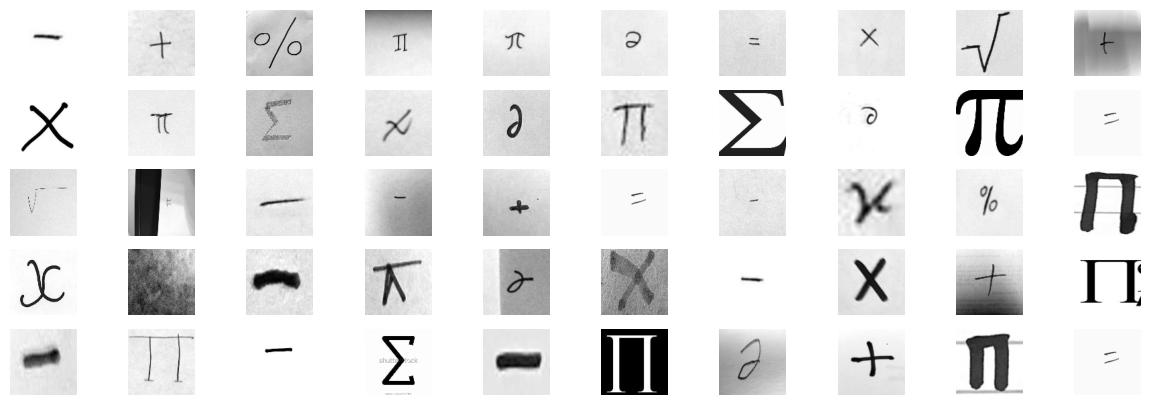

In [8]:
plt.figure(figsize=(15,5))
for i in range(k):
    plt.subplot(5,10,i+1)
    plt.imshow(X_representative_symbol[i,:].reshape(100,100), cmap='gray')
    plt.axis('off')

In [9]:
# manually provide a label to the cluster centroids
t_representative_symbol = np.array([3,9,3,8,6,4,0,3,4,0,
                                   3,2,4,0,0,9,3,4,0,6,
                                   8,8,0,6,3,3,3,8,1,3,
                                   0,0,8,3,0,4,1,3,8,8,
                                   2,5,6,9,2,4,6,8,3,3])

In [10]:
labels = np.empty(X.shape[0])

for i in range(k): 
    labels[kmeans.labels_==i] = t_representative_symbol[i]
    
labels.shape

(3871,)

2. (5 points) **Repeat part (1) for $k=100$.**

In [11]:
k = 100

kmeans100 = KMeans(n_clusters=k, random_state=3) 

# distance of each sample to the cluster centroid
X_dist = kmeans100.fit_transform(X) 

X_dist.shape

(3871, 100)

In [12]:
# find the representative sample
# the one with the closest distance to the cluster centroid

X_representative_symbol = np.argmin(X_dist, axis=0)

X_representative_symbol.shape

(100,)

In [13]:
X_representative_symbol = X[X_representative_symbol]

X_representative_symbol.shape

(100, 10000)

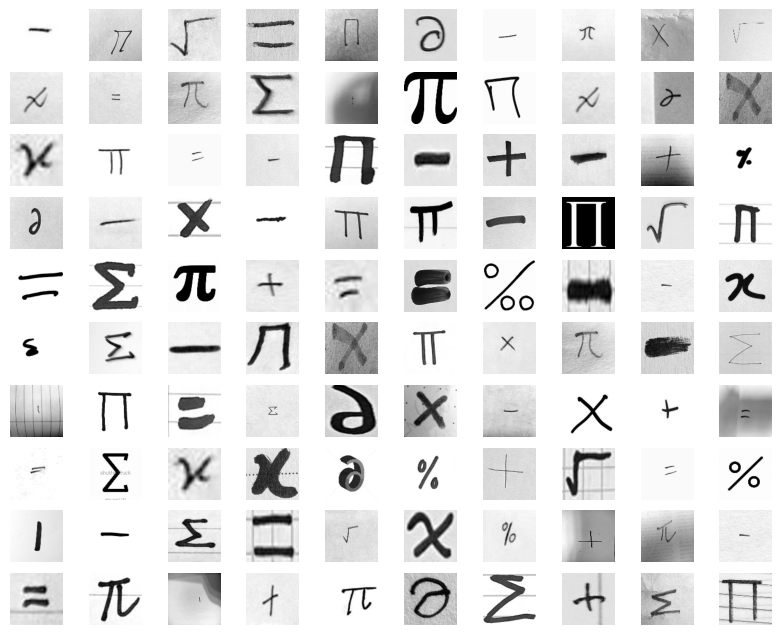

In [14]:
plt.figure(figsize=(10,8))
for i in range(k):
    plt.subplot(10,10,i+1)
    plt.imshow(X_representative_symbol[i,:].reshape(100,100), cmap='gray')
    plt.axis('off')

In [15]:
# manually provide a label to the cluster centroids
t_representative_symbol = np.array([3,0,3,0,2,4,0,8,0,4,
                                   2,3,9,8,0,3,8,3,6,3,
                                   4,3,3,3,6,5,3,0,6,4,
                                   3,4,6,8,1,8,0,2,1,3,
                                   4,9,8,8,2,1,4,1,2,4,
                                   6,3,5,4,8,9,4,0,9,3,
                                   8,0,8,6,3,3,6,8,8,8,
                                   5,8,1,5,9,3,9,8,3,6,
                                   5,5,8,2,4,4,4,4,3,0,
                                   9,6,3,1,3,6,6,9,8,1])

In [16]:
labels100 = np.empty(X.shape[0])

for i in range(k): 
    labels100[kmeans.labels_==i] = t_representative_symbol[i]
    
labels100.shape

(3871,)

---

# Question 2 (6 points)

**Suppose that your labmate manually labeled all images and sent you the ```numpy``` file.**

In [17]:
manual_labels = np.load('labels.npy')

manual_labels.shape

(3871,)

1. (4 points) **Choose a performance metric to compare the manual annotated labels with those you found in question (1). Discuss observations.**

In [18]:
rand_score(manual_labels, labels)

0.7404220210309617

In [19]:
rand_score(manual_labels, labels100)

0.764692068565234

The labels found with $k=100$ examples return a larger rand score value, indicating that a larger number of example is needed to effectively perform label propagation.

2. (2 points) **Use the best performing labels to perform an 80/20 stratified train-validation split.**

In [20]:
X_train, X_val, t_train, t_val = train_test_split(X, labels100,
                                                 test_size=0.2,
                                                 random_state=0,
                                                 stratify=labels100)

X_train.shape, t_train.shape, X_val.shape, t_val.shape

((3096, 10000), (3096,), (775, 10000), (775,))

---

**Use the resulting training and validation sets for the next 2 questions.**

# Question 3 (13 points)

1. (10 points) **Train a symmetrical convolutional auto-encoder on this dataset. The encoder architecture should have the following architecture:**

* **2-D convolution layer with 16 $3\times 3$ kernels, zeros-padding, and ```selu``` activation function.**
* **2-D max-pooling layer with polling size of 2.**
* **2-D convolution layer with 32 $3\times 3$ kernels, zeros-padding, and ```selu``` activation function.**
* **2-D max-pooling layer with polling size of 2.**
* **2-D convolution layer with 64 $3\times 3$ kernels, zeros-padding, and ```selu``` activation function.**
* **2-D max-pooling layer with polling size of 2.**

**Compile the model with the binary cross-entropy and ```SGD``` optimizer without momentum and learning rate $\eta=1.5$. Train for at least 10 epochs.**

In [21]:
# Encoder
conv_encoder = keras.models.Sequential([
    keras.layers.Input(shape=(100, 100)),
    keras.layers.Reshape((100, 100, 1)),
    keras.layers.Conv2D(16, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2)
])

# Decoder
conv_decoder = keras.models.Sequential([
    keras.layers.Input(shape=(12, 12, 64)),
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2,
                                 padding='valid', activation='selu'),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2,
                                 padding='same', activation='selu'),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2,
                                 padding='same', activation='sigmoid'),
    keras.layers.Reshape((100, 100))
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

In [22]:
N_train = X_train.shape[0]
N_val = X_val.shape[0]

In [23]:
conv_ae.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1.5))

history = conv_ae.fit(X_train.reshape((N_train,100,100)), X_train.reshape((N_train,100,100)), 
                      epochs=10,
                      validation_data=(X_val.reshape((N_val,100,100)), X_val.reshape((N_val,100,100))))

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.6205 - val_loss: 0.6283
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.5888 - val_loss: 0.6072
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.5639 - val_loss: 0.5558
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.5464 - val_loss: 0.5428
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.5447 - val_loss: 0.5355
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.5484 - val_loss: 0.5437
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.5393 - val_loss: 0.5292
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.5307 - val_loss: 0.5319
Epoch 9/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.5300 - val_loss: 0.5622
Epoch 10/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.5317 - val_loss: 0.5236


2. (3 points) **Use the trained auto-encoder to visualize image reconstructions.**

In [26]:
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')

def show_reconstructions(model, n_images=15):
    reconstructions = model.predict(X_val[:n_images].reshape((n_images,100,100)))
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_val[image_index].reshape((100,100)))
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


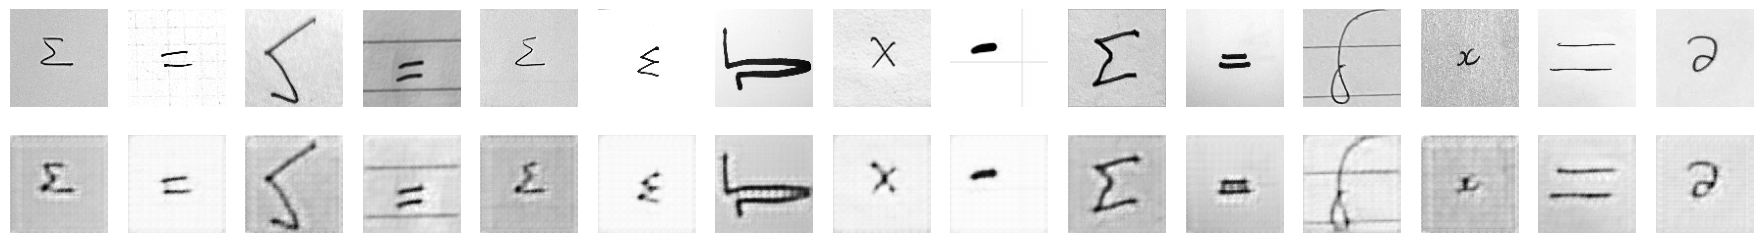

In [27]:
show_reconstructions(conv_ae)

---

# Question 4 (15 points)

**Use the encoder portion of the auto-encoder in question (3) to perform transfer learning.**

**Add the following layers on top of the _frozen_ encoder:**
* **a flatten layer,**
* **a dense layer with 500 units with the ```relu``` activation function,**
* **an output layer with 10 units with softmax activation function.**

**Choose an appropriate objective function with the Nadam optimizer. Train the model for at least 50 epochs.**

In [24]:
base_model = conv_encoder
base_model.trainable = False

In [25]:
inputs = keras.Input(shape=(100, 100))
# Input layer

x = base_model(inputs, training=False)

In [26]:
inputs.shape, x.shape

((None, 100, 100), (None, 12, 12, 64))

In [27]:
# Option 2: Flattening

# Convert features of shape `base_model.output_shape[1:]` to vectors
x_flatten = keras.layers.Flatten()(x)

x_flatten.shape

(None, 9216)

In [28]:
x_dense = keras.layers.Dense(500, activation='relu')(x_flatten)

# A Dense classifier with 10 units and softmax activation function
outputs = keras.layers.Dense(10, activation='softmax')(x_dense)

model = keras.Model(inputs, outputs)

In [29]:
inputs.shape, x.shape, x_flatten.shape, x_dense.shape, outputs.shape

((None, 100, 100), (None, 12, 12, 64), (None, 9216), (None, 500), (None, 10))

In [30]:
model.compile(optimizer=keras.optimizers.Nadam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train.reshape((N_train,100,100)),t_train, epochs=50,
          validation_data=(X_val.reshape((N_val,100,100)), t_val),
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5530 - loss: 3.9810 - val_accuracy: 0.7432 - val_loss: 1.0038
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8311 - loss: 0.6389 - val_accuracy: 0.7716 - val_loss: 0.9593
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8641 - loss: 0.5000 - val_accuracy: 0.7923 - val_loss: 0.8361
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9221 - loss: 0.2644 - val_accuracy: 0.7703 - val_loss: 1.1308
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9300 - loss: 0.2972 - val_accuracy: 0.7897 - val_loss: 0.8230
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9548 - loss: 0.2050 - val_accuracy: 0.7910 - val_loss: 0.9401
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9543 - loss: 0.2106 - val_accuracy: 0.7781 - val_loss: 1.8727
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9446 - loss: 0.2981 - val_accuracy: 0.8142 - v

---